## Statistics Final Project

Name : Santhosh Pattamudu Manoharan


Dataset Name : House Prediction 2023 Posgraduate DSUB (Kaggle Competition)

Dataset Link : https://www.kaggle.com/competitions/housing-house-prediction-2023-posgraduate-dsub/overview

Dataset Overview:

This dataset contains information about houses, including details like the number of rooms, type of property, price, method of sale, and location. It's a mix of numbers (like room count, distance to city center) and categories (like suburb names, sales method). These details help us understand what influences house prices. For example, we can see how factors like the size of the property, its location, and other characteristics of the property affect the price. By studying this data, we can develop methods to predict house prices more accurately, which can be useful for buyers, sellers, and real estate professionals in making informed decisions.

Features of this Dataset:

- Suburb
- Address
- Rooms
- Type
- Price
- Method
- SellerG
- Date
- Distance
- Postcode
- Bedroom2
- Bathroom
- Car
- Landsize
- BuildingArea
- YearBuilt
- CouncilArea
- Lattitude
- Longtitude
- Regionname
- Propertycount
- Year





## Loading the data

In [162]:
library(tidyverse)

# Read the CSV file into a data frame
data <- read.csv("house_price_clean.csv")

# View the first few rows of the data frame
head(data)

,index,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,⋯,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,X,year
,<int>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,⋯,<int>,<dbl>,<int>,<chr>,<dbl>,<dbl>,<chr>,<int>,<lgl>,<int>
1,0,Aberfeldie,241 Buckley St,4,h,1380000,VB,Nelson,8/12/2017,7.5,⋯,766,126,1970,Moonee Valley,-37.75595,144.9055,Western Metropolitan,1543,NA,2017
2,1,Northcote,67 Charles St,2,h,1100000,SP,Jellis,5/20/2017,5.5,⋯,189,126,1970,Darebin,-37.77670,144.9924,Northern Metropolitan,11364,NA,2017
3,2,Balwyn North,42 Maud St,3,h,1480000,PI,Jellis,10/15/2016,9.2,⋯,605,116,1950,Boroondara,-37.79510,145.0696,Southern Metropolitan,7809,NA,2016
4,3,Brunswick,13 Percy St,3,h,1055000,S,Nelson,5/7/2016,5.2,⋯,324,126,1930,Moreland,-37.76530,144.9586,Northern Metropolitan,11918,NA,2016
5,4,Templestowe Lower,253 Thompsons Rd,4,h,1000000,VB,hockingstuart,8/13/2016,13.8,⋯,728,164,1970,Manningham,-37.76800,145.1027,Eastern Metropolitan,5420,NA,2016
6,5,Coburg,4/34 Gladstone St,2,u,650000,S,Barry,4/29/2017,7.8,⋯,136,81,1975,Moreland,-37.74490,144.9754,Northern Metropolitan,11204,NA,2017


In [163]:
colnames(data)

[1] "index"         "Suburb"        "Address"       "Rooms"        
 [5] "Type"          "Price"         "Method"        "SellerG"      
 [9] "Date"          "Distance"      "Postcode"      "Bedroom2"     
[13] "Bathroom"      "Car"           "Landsize"      "BuildingArea" 
[17] "YearBuilt"     "CouncilArea"   "Lattitude"     "Longtitude"   
[21] "Regionname"    "Propertycount" "X"             "year"

## Data Transformation 

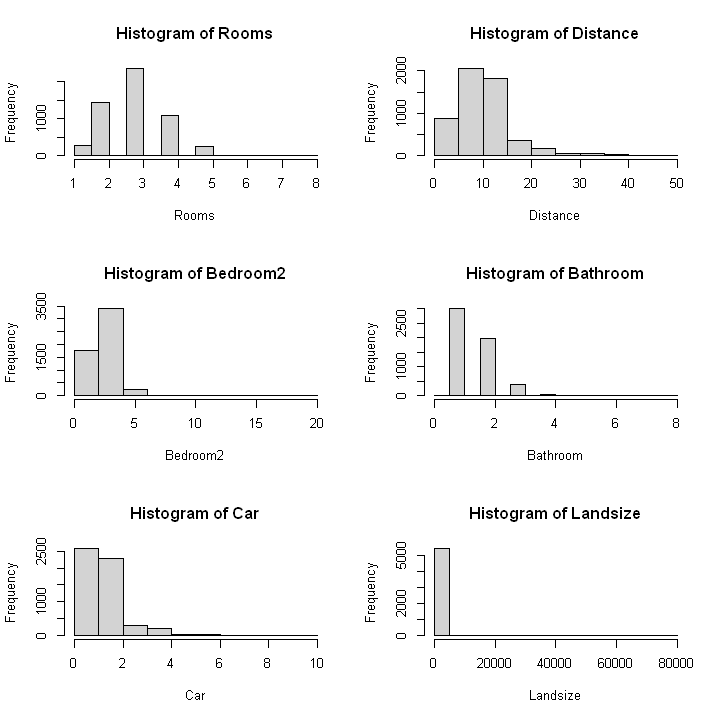

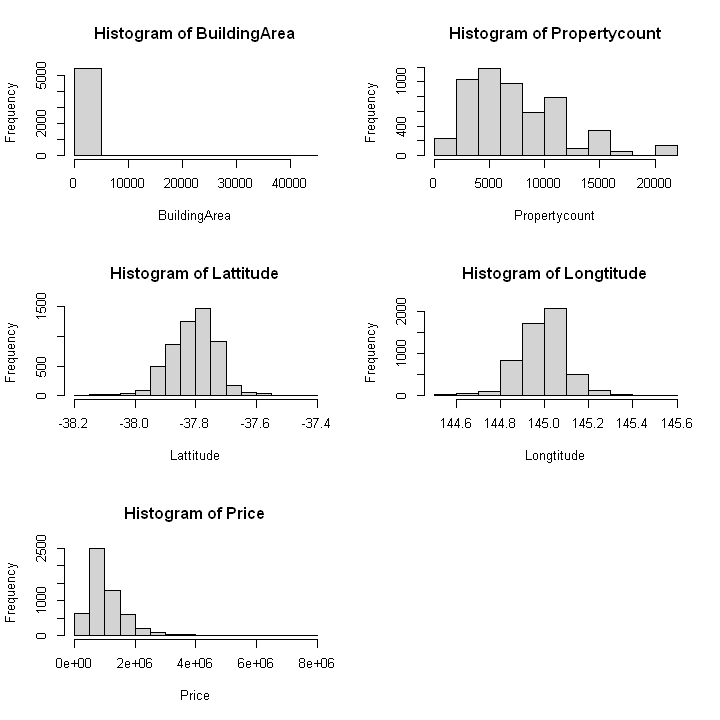

In [164]:
#slicing the data
data <- data[0:5432,]

#reorder the features
data_num <-data   %>%
  select(Rooms, Distance, Bedroom2, Bathroom,Car,Landsize,BuildingArea,Propertycount,Lattitude,Longtitude,Price)
par(mfrow=c(3, 2))

# plot the histogram
for (col in names(data_num)) {
  hist(data[[col]], main=paste("Histogram of", col), xlab=col)
}

As most of the features are skewed, applying Log transformation to reduce bias due to the skewness.  

In [165]:
# Apply log transformation to all the features.
data$Rooms <- log(data$Rooms)
data$Distance <- log(data$Distance)
data$Bedroom2 <- log(data$Bedroom2)
data$Bathroom <- log(data$Bathroom)
data$Car <- log(data$Car)
data$Landsize <- log(data$Landsize)
data$BuildingArea <- log(data$BuildingArea)
data$Propertycount <- log(data$Propertycount)
data$Price <- log(data$Price)

### Correlation Plot

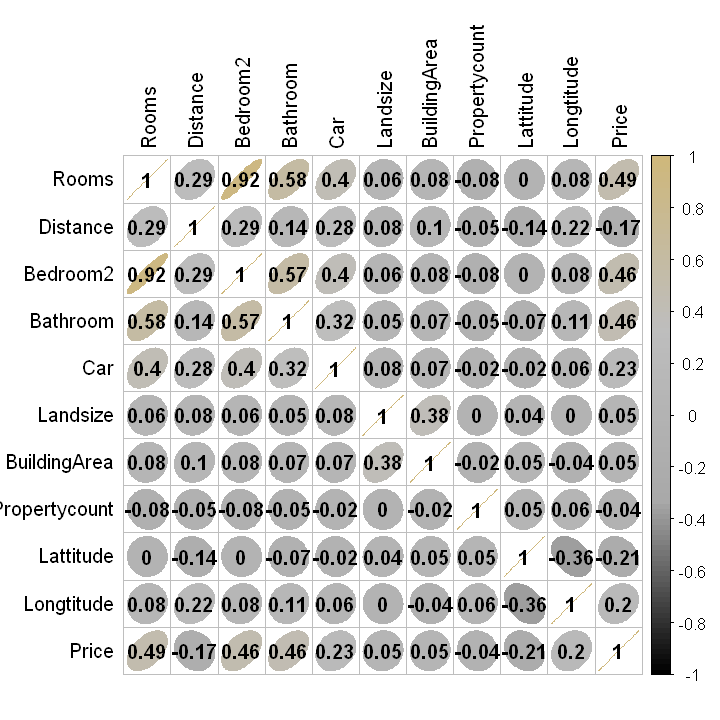

In [166]:
library(corrplot)
col4 = colorRampPalette(c("black", "darkgrey", "grey","#CFB87C"))
corrplot(cor(data_num), method = "ellipse", col = col4(100),  addCoef.col = "black", tl.col = "black")

### Data Cleaning


#### Removing (Inf or -Inf) from the dataset

When performing a log transformation on data, it's common to encounter situations where certain data points become infinite. To address this issue it is necessary to remove those data points.

In [167]:
#remove infinity values
d <- data[!apply(data, 1, function(row) any(is.infinite(row))), , drop = FALSE]

#replace -infinity to NA values
d <- replace(d, d == -Inf, NA)

#One hot encoding
d <- cbind(d, model.matrix(~ Regionname - 1, data = d))
d <- d[, -which(names(d) == "Regionname")]
d <- cbind(d, model.matrix(~ Type - 1, data = d))
d <- d[, -which(names(d) == "Type")]

# remove Nan
# d <-  d[complete.cases(d), ]

#remove unused columns
d <- d[, -which(names(d) %in% c('index','Suburb','Method','SellerG','YearBuilt','CouncilArea','Date','X','Address','Typeu'))]



#clean column names
colnames(d) <- gsub("\\s+", "", colnames(d))
colnames(d) <- gsub("-", "", colnames(d))

head(d)

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Lattitude,⋯,RegionnameEasternMetropolitan,RegionnameEasternVictoria,RegionnameNorthernMetropolitan,RegionnameNorthernVictoria,RegionnameSouthEasternMetropolitan,RegionnameSouthernMetropolitan,RegionnameWesternMetropolitan,RegionnameWesternVictoria,Typeh,Typet
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1.3862944,14.13759,2.014903,3040,1.3862944,0.6931472,0.6931472,6.641182,4.836282,-37.75595,⋯,0,0,0,0,0,0,1,0,1,0
2,0.6931472,13.91082,1.704748,3070,0.6931472,0.0000000,0.0000000,5.241747,4.836282,-37.77670,⋯,0,0,1,0,0,0,0,0,1,0
3,1.0986123,14.20755,2.219203,3104,1.0986123,0.0000000,1.3862944,6.405228,4.753590,-37.79510,⋯,0,0,0,0,0,1,0,0,1,0
4,1.0986123,13.86905,1.648659,3056,1.0986123,0.0000000,0.0000000,5.780744,4.836282,-37.76530,⋯,0,0,1,0,0,0,0,0,1,0
5,1.3862944,13.81551,2.624669,3107,1.3862944,1.0986123,0.6931472,6.590301,5.099866,-37.76800,⋯,1,0,0,0,0,0,0,0,1,0
6,0.6931472,13.38473,2.054124,3058,0.6931472,0.0000000,0.0000000,4.912655,4.394449,-37.74490,⋯,0,0,1,0,0,0,0,0,0,0


In [168]:
d <- d[complete.cases(d), ]


## Exploratory Data Analysis

### Types of houses in Autralia 


There are three typee of categories in this dataset and the following are the key for the types of the column.

* h - House, Cottage, Villa ,Semi, Terrace
* u - Unit, Duplex
* t - Townhouse

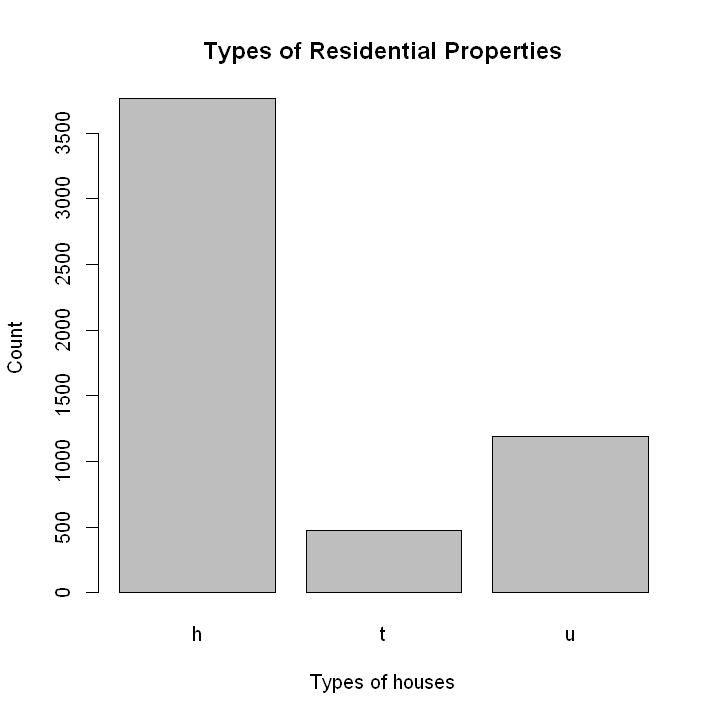

In [169]:
barplot(table(as.factor(data$Type)),main = "Types of Residential Properties", xlab = "Types of houses", ylab = "Count")


We can see that the house type is significantly more than the other types like townhouses and duplex units. Around more than 3500 units of houses, 500 townhouses and then 1500 duplex units.

### Properties in Different Regions

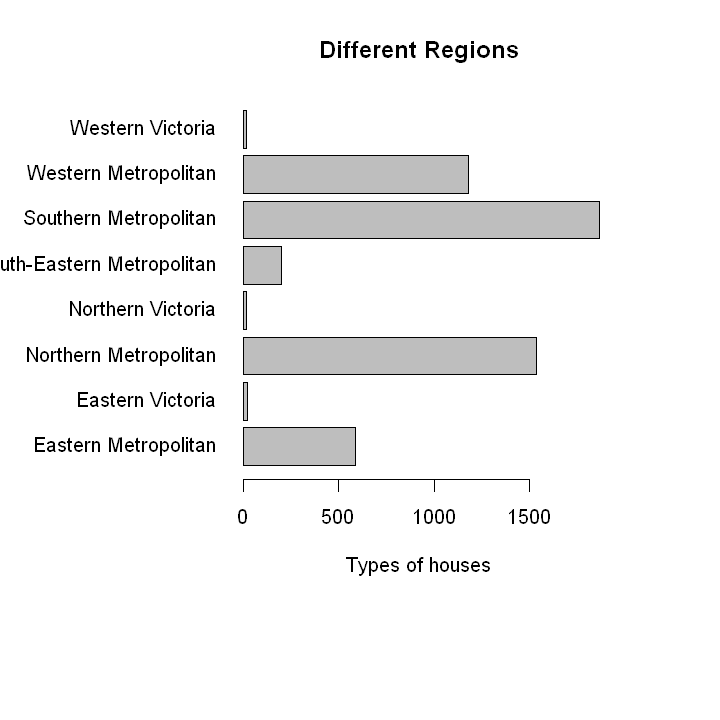

In [170]:
par(mar = c(10, 10, 4, 5))  
barplot(table(as.factor(data$Regionname)),main = "Different Regions", xlab = "Types of houses",horiz = TRUE,las = 1)

The Southern Metropolitan region has the highest number of houses whereas the Victoria regions such as Western Victoria, Northern Victoria and Eastern Victoria has lowest properties. This information can be valuable for land promotors to make investments in these locations.

# Statistical Analysis on Australian House Price Prediction 


## 1. Hypothesis Testing

In this analyses we will test the hypothesis. **Whether the Average Distance from the Central Business District of Australia residential property is 6.87Kms or not**.

$H_0 = \text{The Average distance from the Central Business District of Australian Residential Property is equal to 6.87kms}$


$H_A =\text{ The Average distance from the Central Business District of Australian Residential Property is not equal to 6.87 kms}$

Since we do not know the population variance, so using the T-test would give accurate results.


To ensure robust results, we take sample under the 30 rows, as it provided enough observations to reliable estimation of the population average of the distance from Central Business District.

In [186]:

distance <- d$Distance


distance <- sample(d$Distance,28)

#cal mean and sd
sample_mean <- mean(distance)
sample_sd <- sd(distance)

#assummed value
assume_value <- 6.7

# t-test (one sample)
test_result <- t.test(distance, mu = assume_value)

# get the results
test_statistic <- test_result$statistic
p_value <- test_result$p.value

cat("Test Statistic:", test_statistic, "\n")
cat("P-value:", p_value, "\n")

sig <- 0.05
if (p_value < sig) {
  cat("Reject the null hypothesis. There is evidence to support the claim that the average distance from CBD in Australia is different from", specified_value, "kilometers.\n")
} else {
  cat("Fail to reject the null hypothesis. There is not enough evidence to conclude that the average distance from CBD in Australia is different from", specified_value, "kilometers.\n")
}


Test Statistic: -47.78003 
P-value: 1.257296e-27 
Reject the null hypothesis. There is evidence to support the claim that the average distance from CBD in Australia is different from 6.7 kilometers.


From the results we can conclude that we reject the null hypothesis in favour of the distance from the CBD for an Australian Residential property is not equal to 6.87kms.

## 2. Confidence Interval

It can be found using the confidence interval method in which the range of the population parameters likely to be present based on the confidence and the margin of error in the data. It is very helpful in inferential statistics by providing the width of population parameters helping in decision making process.


**Finding the mean sale price of the houses in Australia, assuming this data as the sample using the confidence interval based on the charateristics of sample data and confidence level (95%).** 









In [187]:
# confidence level 95%
conf <- 0.95 
#retransform the log using exp() 
sale_price <- exp(d$Price)

# find the mean and std error
s_mean <- mean(sale_price)
s_sd <- sd(sale_price)
std_error <- s_sd / sqrt(length(sale_price))

# Calculate the margin of error
z_value <- qnorm((1 + conf) / 2)
m_error <- z_value * std_error

# Calculate the confidence interval
lower_limit <- s_mean - m_error
upper_limit <- s_mean + m_error

# Output the confidence interval
cat("Confidence Interval (", conf * 100, "%): [", lower_limit, ", ", upper_limit, "]\n")

Confidence Interval ( 95 %): [ 1127405 ,  1167025 ]


Based on the results, we can conclude that the Average price of the Australian house will fall inbetween 1127405 and 1167025. 

### 3. Regression Modeling 

Regression modelling involve in finding the mathematical relationship between the independent variables and the dependent variables, they mostly used to predict the dependent variables based on the change of independent variables.

**Predicting the price of the residential property based on the independent features like the numbers of rooms, distance from the CBD, number of bedrooms, number of bathrooms, number of cars, the landsize, building area, number of property in the community and the location metrics.**



In [174]:
#fit the full model
mlr_model <- lm(Price ~ . , data = d)

(Intercept)                              Rooms 
                     -1.684797e+02                       3.706036e-01 
                          Distance                           Postcode 
                     -4.187929e-01                      -1.878947e-04 
                          Bedroom2                           Bathroom 
                      9.789737e-02                       1.376598e-01 
                               Car                           Landsize 
                      6.676709e-02                       3.011421e-02 
                      BuildingArea                          Lattitude 
                      1.107590e-01                      -6.606595e-01 
                        Longtitude                      Propertycount 
                      9.545467e-01                       2.053251e-03 
                              year      RegionnameEasternMetropolitan 
                      9.254626e-03                       4.992357e-02 
         RegionnameEasternVictoria     RegionnameNorthernMetropolitan 
                     -2.822244e-01                      -8.532712e-02 
        RegionnameNorthernVictoria RegionnameSouthEasternMetropolitan 
                      1.966042e-01                      -7.887192e-02 
    RegionnameSouthernMetropolitan      RegionnameWesternMetropolitan 
                      2.975710e-01                      -5.371978e-04 
         RegionnameWesternVictoria                              Typeh 
                                NA                       4.498052e-01 
                             Typet 
                      2.276986e-01

In [175]:
summary(mlr_model)


Call:
lm(formula = Price ~ ., data = d)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.93750 -0.17349 -0.01316  0.17012  1.37200 

Coefficients: (1 not defined because of singularities)
                                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)                        -1.685e+02  2.126e+01  -7.923 2.93e-15 ***
Rooms                               3.706e-01  4.543e-02   8.157 4.47e-16 ***
Distance                           -4.188e-01  9.748e-03 -42.960  < 2e-16 ***
Postcode                           -1.879e-04  5.901e-05  -3.184 0.001463 ** 
Bedroom2                            9.790e-02  4.434e-02   2.208 0.027315 *  
Bathroom                            1.377e-01  1.291e-02  10.661  < 2e-16 ***
Car                                 6.677e-02  1.072e-02   6.228 5.18e-10 ***
Landsize                            3.011e-02  6.318e-03   4.766 1.94e-06 ***
BuildingArea                        1.108e-01  1.051e-02  10.543  < 2e-16 ***
Lattitude          

###        4.    F-Test

Assuming the significance level  $\alpha = 0.05 $ to determine if atleast one of the features is related to the response variable Y



$H_o = $ No Feature is related to the response variable "Price"


$H_A = $ Atleast one feature is related to the response variable "Price" 

In [176]:
anova(mlr_model)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Rooms,1,255.34903023,255.34903023,3423.3555380,0.000000e+00
Distance,1,181.73813355,181.73813355,2436.4856424,0.000000e+00
Postcode,1,40.98840368,40.98840368,549.5140460,1.776842e-114
Bedroom2,1,1.98846725,1.98846725,26.6585324,2.537229e-07
Bathroom,1,18.90383893,18.90383893,253.4357058,1.719640e-55
Car,1,17.15813354,17.15813354,230.0317782,1.167721e-50
Landsize,1,7.79436522,7.79436522,104.4957300,2.973826e-24
BuildingArea,1,16.02735855,16.02735855,214.8719602,1.627796e-47
Lattitude,1,68.48079419,68.48079419,918.0927996,5.425940e-183




From the results tables we can clearly see that many features has P-value less than the significance level, so we reject the null hypothesis. 



## 5. Diagnostics

Model diagnostics are essential in assessing the validity and reliability of linear regression models, these methods identifies the issues with the model. Some of the diagonistics we have done in this analysis are as follows:

- Goodness of Fit ($R^2$) 
- Forward Selection
- Residual Analysis
    - Linearity
    - Normality
    - Constant Variance
     


###  a). Goodness of Fit ($R^2$)

In [177]:
summary(mlr_model)


Call:
lm(formula = Price ~ ., data = d)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.93750 -0.17349 -0.01316  0.17012  1.37200 

Coefficients: (1 not defined because of singularities)
                                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)                        -1.685e+02  2.126e+01  -7.923 2.93e-15 ***
Rooms                               3.706e-01  4.543e-02   8.157 4.47e-16 ***
Distance                           -4.188e-01  9.748e-03 -42.960  < 2e-16 ***
Postcode                           -1.879e-04  5.901e-05  -3.184 0.001463 ** 
Bedroom2                            9.790e-02  4.434e-02   2.208 0.027315 *  
Bathroom                            1.377e-01  1.291e-02  10.661  < 2e-16 ***
Car                                 6.677e-02  1.072e-02   6.228 5.18e-10 ***
Landsize                            3.011e-02  6.318e-03   4.766 1.94e-06 ***
BuildingArea                        1.108e-01  1.051e-02  10.543  < 2e-16 ***
Lattitude          

The $R^2 = 0.7096$ with 22 features which can be improved using feature selection methods but other than that the model explains the overall variance present in the data.

### b) Forward Select

In [179]:
forward_select <- function(df, resp_str, maxk) {
  selected_features <- c() 
  other_feat <- setdiff(names(df), resp_str)
  Y <- df[[resp_str]]
  for (k in 1:maxk) {
    best_feature <- NULL
    low_sse <- Inf  
    
    for (feature in other_feat) {
      input_feature <- c(selected_features, feature)
      model <- lm(paste(resp_str, "~", paste(input_feature, collapse = " + ")), data = df)
      y_hat <- predict(model, newdata = df)
      sse <- sum((Y - y_hat)^2)
      
      if (sse < low_sse) {  
        low_sse <- sse  
        best_feature <- feature
      }
    }
    selected_features <- c(selected_features, best_feature)
    other_feat <- setdiff(other_feat, best_feature)
    
    cat(paste("Step: ", k, " ", best_feature, " has been added.\n" ))
  }
  
  return(selected_features)
}


forward_select(d,"Price",10)

Step:  1   Rooms  has been added.
Step:  2   RegionnameSouthernMetropolitan  has been added.
Step:  3   Distance  has been added.
Step:  4   Typeh  has been added.
Step:  5   Longtitude  has been added.
Step:  6   Bathroom  has been added.
Step:  7   RegionnameNorthernMetropolitan  has been added.
Step:  8   Typet  has been added.
Step:  9   BuildingArea  has been added.
Step:  10   Car  has been added.


[1] "Rooms"                          "RegionnameSouthernMetropolitan"
 [3] "Distance"                       "Typeh"                         
 [5] "Longtitude"                     "Bathroom"                      
 [7] "RegionnameNorthernMetropolitan" "Typet"                         
 [9] "BuildingArea"                   "Car"

In [181]:
#adjusted model
mlr_new_model <- lm(Price ~  Rooms+RegionnameSouthernMetropolitan+Distance+Typeh+Longtitude+Bathroom+RegionnameNorthernMetropolitan + Typet+ BuildingArea+Car, data = d)



In [182]:
summary(mlr_new_model)


Call:
lm(formula = Price ~ Rooms + RegionnameSouthernMetropolitan + 
    Distance + Typeh + Longtitude + Bathroom + RegionnameNorthernMetropolitan + 
    Typet + BuildingArea + Car, data = d)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.94204 -0.17686 -0.01278  0.16615  1.40765 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    -1.393e+02  5.775e+00 -24.116  < 2e-16 ***
Rooms                           4.735e-01  1.966e-02  24.082  < 2e-16 ***
RegionnameSouthernMetropolitan  3.099e-01  1.107e-02  27.996  < 2e-16 ***
Distance                       -4.326e-01  8.992e-03 -48.110  < 2e-16 ***
Typeh                           4.458e-01  1.520e-02  29.328  < 2e-16 ***
Longtitude                      1.052e+00  3.987e-02  26.377  < 2e-16 ***
Bathroom                        1.312e-01  1.296e-02  10.123  < 2e-16 ***
RegionnameNorthernMetropolitan -1.446e-01  1.129e-02 -12.808  < 2e-16 ***
Typet                 

### c) Residual Analysis

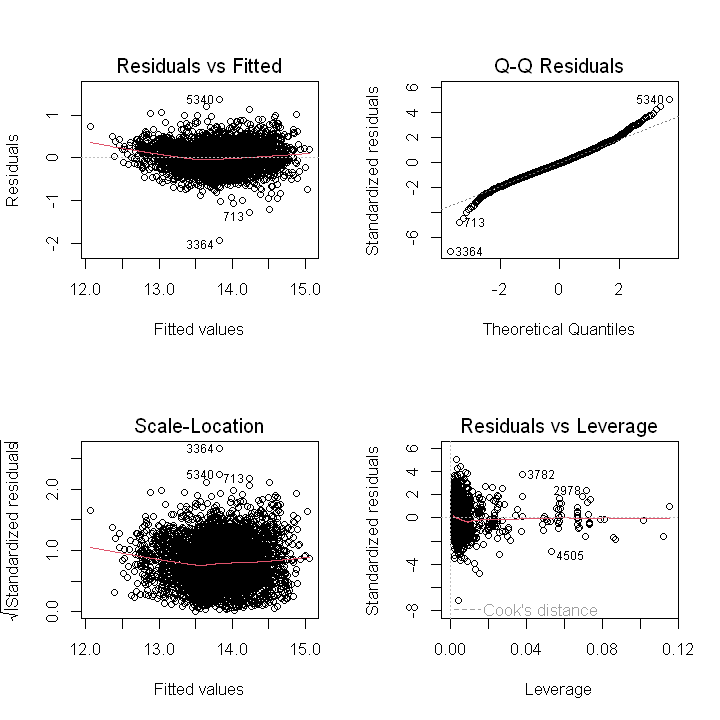

In [183]:
#df for residual analysis
diag_1 = data.frame(yhat = fitted(mlr_model), r = resid(mlr_model,type = "pearson"), y = d$Price,
                           Rooms = d$Rooms, Distance =  d$Distance , Longtitude = d$Longtitude , Lattitude = d$Lattitude , BuildingArea = d$BuildingArea , Car = d$Car , Bathroom = d$Bathroom)


par(mfrow = c(2,2))
plot(mlr_model)



Constant Variance - The variance is the constant across the overall data.

Normality - It can be inferred from the QQ Plot that data follows a Normal Distribution but we can see at both ends there is slight deviation.




`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


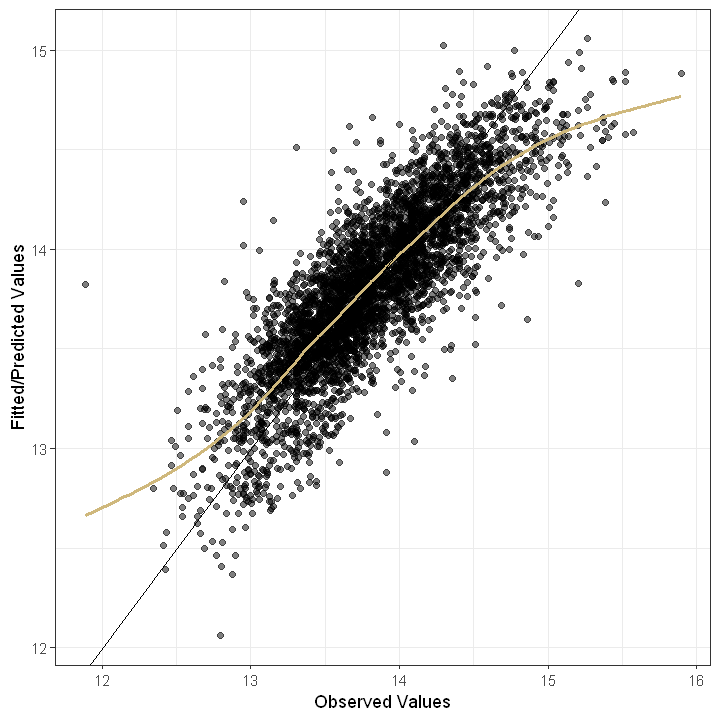

In [184]:
options(repr.plot.width = 6, repr.plot.height = 6)
ggplot(diag_1, aes(x = y, y = yhat)) + 
    geom_point(alpha = 0.5) + 
    geom_smooth(se = F, col = "#CFB87C") +
    geom_abline(intercept = 0, slope = 1)+
    xlab("Observed Values") +
    ylab("Fitted/Predicted Values") +
    theme_bw()

Linearity - The above plot shows that the model captures most of variance but it overpredicts and underpredicts in both tails, which seem to violate the linearity assumption.

### Report

## 1. Introduction 

The 5% of Australian GDP is contribbuted by the Housing market. It is very stable than many other countries, many news and reports showing that by 2030 there will be lot of investments in the residential housing market of the Australia. For buyers and sellers, in the growing market it is necessary to have a tool to estimate the housing price based on some factors like numbers of bedrooms, bathrooms, car parking slots, distance from the central business districts and etc.

Prior Research - https://propertyupdate.com.au/predicted-house-prices-for-australia-in-2030/#:~:text=The%20average%20annual%20growth%20rate,around%20%241.2%20million%20in%202030.

The data is collected by the University of Barcelona, for a data sceince postgraduate competition in kaggle.

There some questions which are answered in this project and they are as follows
* Whether the average distance from the Central Business District of Australia is 6.87kms or not?
* Understand the width of the mean sale price of residential properties in Australia.
* Estimate the sale price based on the other predictors like rooms, building area, number of bathrooms etc.
* To find out whether at least one predictor variable is contributing in the estimation of sale price of the residential housing market.
* Are the assumptions of linear regression are violated or not?


## 2. Methods/ Results

* **Data Source** The data has been obtained from the Kaggle competition which was collected by the University of Barcelona, for a data science postgraudate competition. 

* **The exploratory Analysis** 


The histogram of all the numerical features


<img src="images/hist_1.png" alt="Image Description" width="500" height="500">\

<img src="images/hist_2.png" alt="Image Description" width="500" height="500">\

We can see that the most of them are skewed So applying log transformations to all the numerical columns. 


<img src="images/pairwise.png" alt="Image Description" width="500" height="500">\

From the correlation plot we can infer some information about the correlation between the target variable and the predictors.


<img src="images/region_hist.png" alt="Image Description" width="500" height="500">\

We can see that the house type is significantly more than the other types like townhouses and duplex units. Around more than 3500 units of houses, 500 townhouses and then 1500 duplex units.


<img src="images/type_hist.png" alt="Image Description" width="500" height="500">

The Southern Metropolitan region has the highest number of houses whereas the Victoria regions such as Western Victoria, Northern Victoria and Eastern Victoria has lowest properties. This information can be valuable for land promotors to make investments in these locations.


* The following statistical analyses have been done to answer the research questions in the introduction.

    1. Hypothesis Testing
    2. Confidence Interval
    3. Linear Modeling
    4. F Test
    5. Model Diagonistics



### 1. Hypothesis Testing 

In this analyses we will test the hypothesis. **Whether the Average Distance from the Central Business District of Australia residential property is 6.87Kms or not**.

$H_0 = \text{The Average distance from the Central Business District of Australian Residential Property is equal to 6.87kms}$


$H_A = \text{ The Average distance from the Central Business District of Australian Residential Property is not equal to 6.87 kms}$

Since we do not know the population variance, so using the T-test would give accurate results.

To ensure robust results, we take sample under the 30 rows, as it provided enough observations to reliable estimation of the population average of the distance from Central Business District.

$$P-value: 2.212278e-24 $$


From the results we can conclude that we reject the null hypothesis in favour of the distance from the CBD for an Australian Residential property is not equal to 6.87kms.

## 2. Confidence Interval

It can be found using the confidence interval method in which the range of the population parameters likely to be present based on the confidence and the margin of error in the data. It is very helpful in inferential statistics by providing the uncertainity in the population parameters helping in decision making process.


**Finding the mean sale price of the houses in Australia, assuming this data as the sample using the confidence interval based on the charateristics of sample data and confidence level (95%).** 

$$ \text{Confidence Interval - 95\%: [ 1127405 ,  1167025 ] }$$

Based on the results, we can conclude that the Average price of the Australian house will fall inbetween 1127405 and 1167025. 

### 3. Regression Modeling 

Regression modelling invovlee in finding the mathematical relationship between the independent variables and the dependent variables, they mostly used to predict the dependent variables based on the change of independent variables.

**Predicting the price of the residential property based on the independent features like the numbers of rooms, distance from the CBD, number of bedrooms, number of bathrooms, number of cars, the landsize, building area, number of property in the community and the location metrics.**



###        4.    F-Test

Assuming the significance level  $\alpha = 0.05 $ to determine if atleast one of the features is related to the response variable Y



$H_o = $ No Feature is related to the response variable "Price"


$H_A = $ Atleast one feature is related to the response variable "Price" 



From the results tables we can clearly see that many features has P-value less than the significance level. 

## 5. Diagnostics

Model diagnostics are essential in assessing the validity and reliability of linear regression models, these methods identifies the issues with the model. Some of the diagonistics we have done in this analysis are as follows:

- Goodness of Fit ($R^2$) 
- Forward Selection
- Residual Analysis
    - Linearity
    - Normality
    - Constant Variance


The $R^2 = 0.5873 $ is low it shows that we need to work in the feature selection process by using the forward select method. 

With Forward select we were able to reduce the feature size significantly. 24 features yielded an R^2 value of 0.7096 with the help forward selection method we reduced the feature size by selecting the features which contributes more to the model while retaining the almost same R^2 value. 



<img src="images/goodness_1.png" alt="Image Description" width="500" height="500">\

<img src="images/goodness_2.png" alt="Image Description" width="500" height="500">\

Linear Modeling Assumptions :


Constant Variance - The variance is the constant across the overall data.

Normality - It can be inferred from the QQ Plot that data follows a Normal Distribution but we can see at both ends there is slight deviation.

Linearity - The above plot shows that the model captures most of variance but it overpredicts and underpredicts in both tails, which seem to violate the linearity assumption.

### 3.  Conclusion:

From this analysis, we got some great insight about the australian housing market, which is the higher contributor to the nation's GDP. Right from the estimation of the average sale price of an property in The Australia to ensuring the violation of linear modeling. 

Next, we can proceed on the model selection process, using the AIC, BIC and Adjusted R^2 to select the best model based on the combination of all predictors contributing to the prediciton of the target variable with less error.